# Online Retail Fraud Detection
* https://archive.ics.uci.edu/dataset/352/online+retail

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
# INSTALL FOR READING EXCEL
#!pip install openpyxl

df = pd.read_excel('../../data/online_retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Handle Missing Values

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Set index to Datetime 

In [6]:
#data['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.sort_values(by=['InvoiceDate'], inplace=True)
df.set_index(df['InvoiceDate'], inplace=True)
df.drop('InvoiceDate', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


# Visualization

<Axes: xlabel='InvoiceDate'>

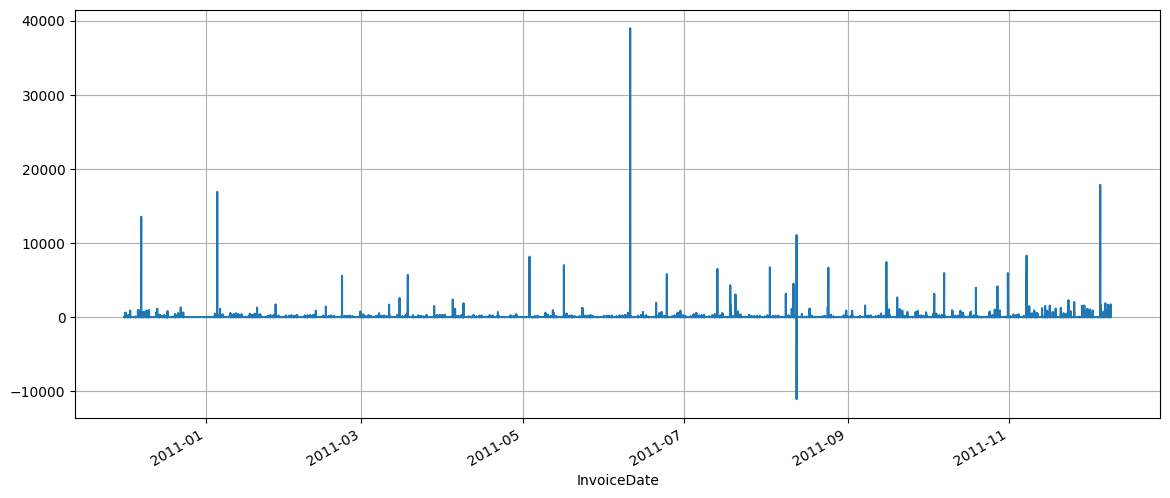

In [7]:
df['UnitPrice'].plot(figsize=(14, 6), grid='on')

<Axes: xlabel='InvoiceDate'>

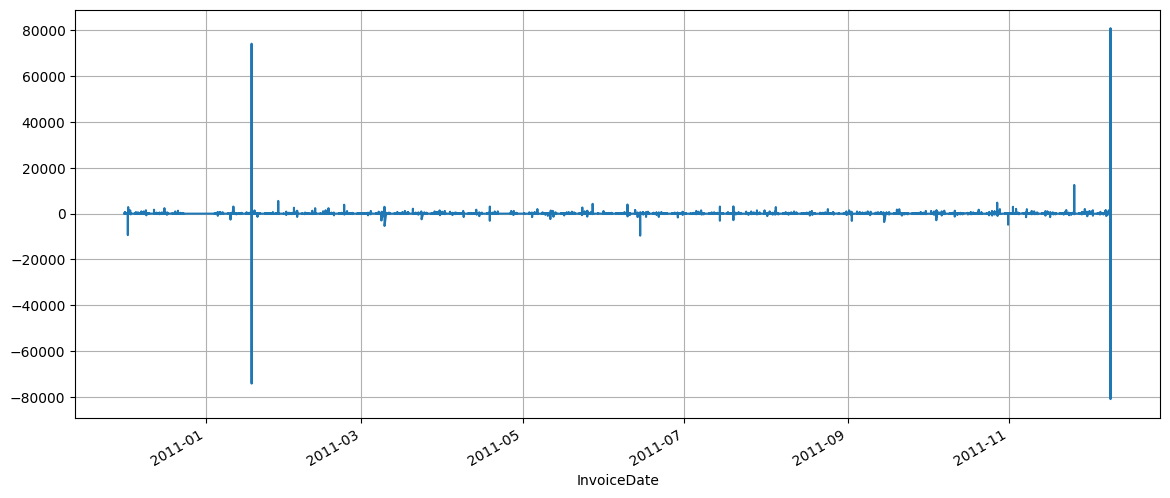

In [8]:
df['Quantity'].plot(figsize=(14, 6), grid='on')

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1, 1))

scaler.fit(df[['UnitPrice', 'Quantity']])

StandardScaler()

In [11]:
df[['UnitPrice', 'Quantity']] = scaler.transform(df[['UnitPrice', 'Quantity']])

# Visualization (Scaled)

<Axes: xlabel='InvoiceDate'>

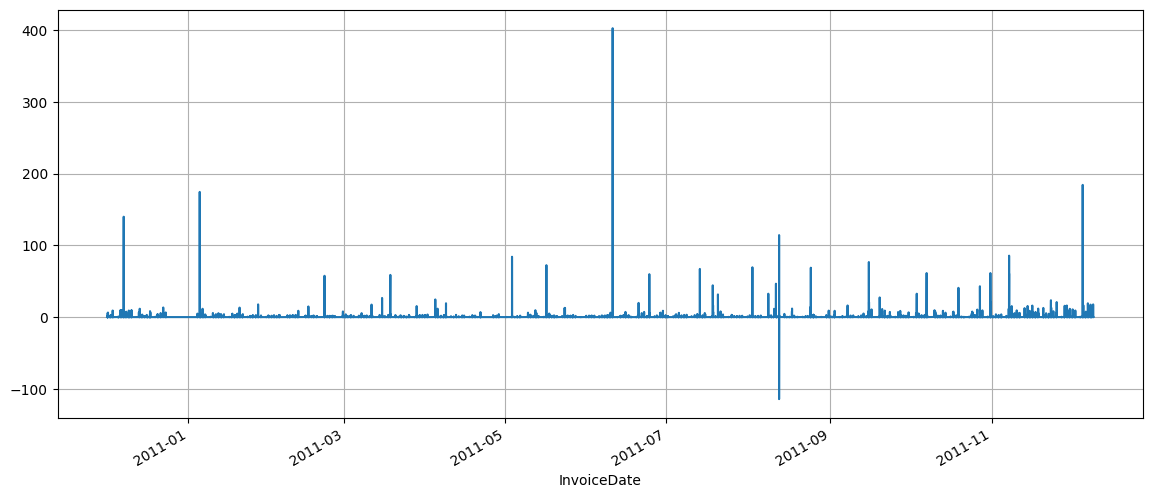

In [12]:
df['UnitPrice'].plot(figsize=(14, 6), grid='on')

<Axes: xlabel='InvoiceDate'>

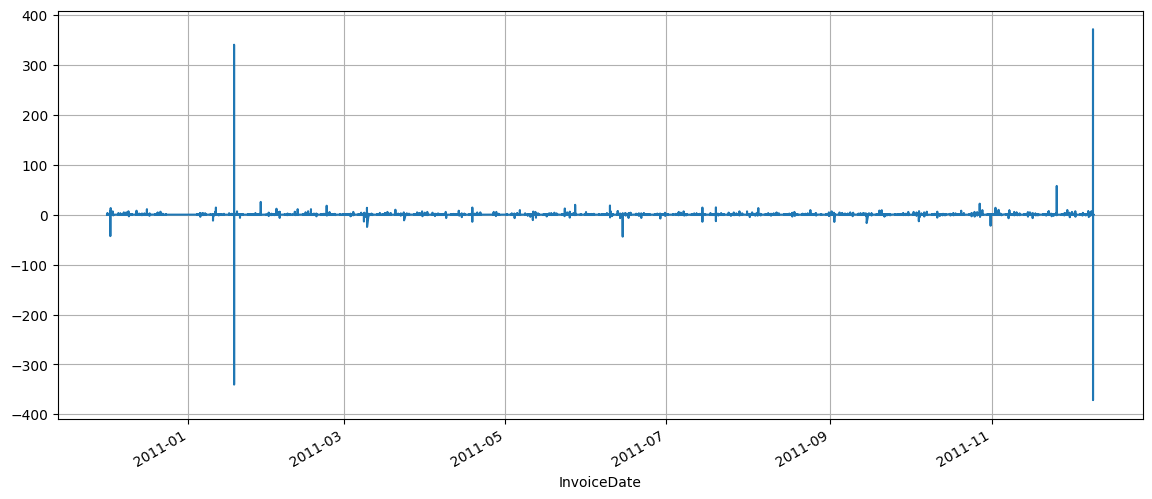

In [13]:
df['Quantity'].plot(figsize=(14, 6), grid='on')

# Threshold AD
### Unit Price

In [14]:
unitprice_threshold = 50.0

df['anomalies_unitprice'] = df['UnitPrice'].abs() > unitprice_threshold
df['anomalies_unitprice'] = df['anomalies_unitprice'].apply(int)

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,anomalies_unitprice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.016289,-0.021301,17850.0,United Kingdom,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,-0.016289,-0.012620,17850.0,United Kingdom,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.007118,-0.019234,17850.0,United Kingdom,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.016289,-0.012620,17850.0,United Kingdom,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.016289,-0.012620,17850.0,United Kingdom,0


In [15]:
df['anomalies_unitprice'].value_counts()

anomalies_unitprice
0    541876
1        33
Name: count, dtype: int64

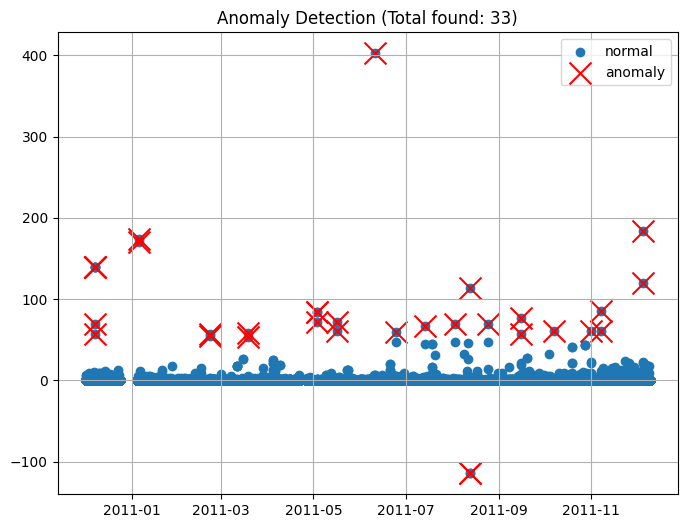

In [16]:
anomaly_points = df[df['anomalies_unitprice'] == 1]

total_anomalies_unitprice = len(anomaly_points)

plt.figure(figsize=(8, 6))
plt.grid('on')

plt.scatter(df.index, df['UnitPrice'], label='normal')
plt.scatter(anomaly_points.index, anomaly_points['UnitPrice'], s=250, c='red', marker='x', label='anomaly')
plt.title(f'Anomaly Detection (Total found: {total_anomalies_unitprice})')
plt.legend()

### Quantity

In [17]:
quantity_threshold = 50.0

df['anomalies_quantity'] = df['Quantity'].abs() > quantity_threshold
df['anomalies_quantity'] = df['anomalies_quantity'].apply(int)

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,anomalies_unitprice,anomalies_quantity
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.016289,-0.021301,17850.0,United Kingdom,0,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,-0.016289,-0.012620,17850.0,United Kingdom,0,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.007118,-0.019234,17850.0,United Kingdom,0,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.016289,-0.012620,17850.0,United Kingdom,0,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.016289,-0.012620,17850.0,United Kingdom,0,0


In [18]:
df['anomalies_quantity'].value_counts()

anomalies_quantity
0    541904
1         5
Name: count, dtype: int64

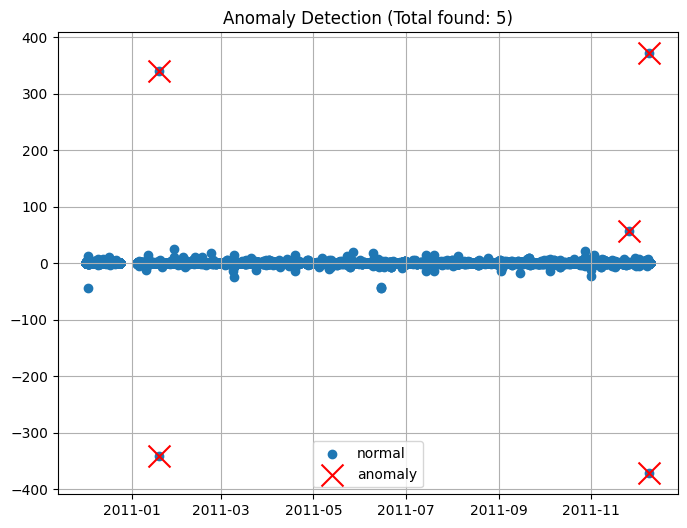

In [19]:
df_anomaly_points_quantity = df[df['anomalies_quantity'] == 1]

total_anomalies_quantity = len(df_anomaly_points_quantity)

plt.figure(figsize=(8, 6))
plt.grid('on')

plt.scatter(df.index, df['Quantity'], label='normal')
plt.scatter(df_anomaly_points_quantity.index, df_anomaly_points_quantity['Quantity'], s=250, c='red', marker='x', label='anomaly')
plt.title(f'Anomaly Detection (Total found: {total_anomalies_quantity})')
plt.legend()

# Dyanmic Threshold

In [20]:
df['Quantity'].sort_values(ascending=False)

InvoiceDate
2011-12-09 09:15:00    371.354973
2011-01-18 10:01:00    340.265601
2011-11-25 15:57:00     57.457781
2011-01-28 12:03:00     25.488002
2011-10-27 12:26:00     21.966374
                          ...    
2010-12-02 14:23:00    -42.963642
2011-06-14 10:37:00    -44.064151
2011-06-14 10:37:00    -44.064151
2011-01-18 10:17:00   -340.353204
2011-12-09 09:27:00   -371.442576
Name: Quantity, Length: 541909, dtype: float64

### Top-K, Bottom-K

In [21]:
k = 10
top_k = df['Quantity'].sort_values(ascending=False)[:k].values
bottom_k = df['Quantity'].sort_values(ascending=True)[:k].values

print(f'top_{k}: {top_k}')
print(f'bottom_{k}: {bottom_k}')

top_10: [371.35497294 340.26560088  57.45778056  25.4880015   21.96637352
  19.67364696  18.29801103  17.86697844  14.5654522   14.23529958]
bottom_10: [-371.44257573 -340.35320367  -44.06415121  -44.06415121  -42.96364247
  -41.57883563  -24.65851367  -22.1915399   -16.85865793  -14.56593138]


In [22]:
upper_threshold = np.abs(top_k).mean()
lower_threshold = np.abs(bottom_k).mean()

print(f'Upper threshold: {upper_threshold:.4f}')
print(f'Lower threshold: {lower_threshold:.4f}')

Upper threshold: 90.1172
Lower threshold: 96.2741


### Dyanmic Threshold AD

In [23]:
df['anomalies_quantity_dynamic'] = (df['Quantity'] < -lower_threshold) | (df['Quantity'] > upper_threshold)
df['anomalies_quantity_dynamic'] = df['anomalies_quantity_dynamic'].apply(int)

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,anomalies_unitprice,anomalies_quantity,anomalies_quantity_dynamic
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.016289,-0.021301,17850.0,United Kingdom,0,0,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,-0.016289,-0.012620,17850.0,United Kingdom,0,0,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.007118,-0.019234,17850.0,United Kingdom,0,0,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.016289,-0.012620,17850.0,United Kingdom,0,0,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.016289,-0.012620,17850.0,United Kingdom,0,0,0


In [24]:
df['anomalies_quantity_dynamic'].value_counts()

anomalies_quantity_dynamic
0    541905
1         4
Name: count, dtype: int64

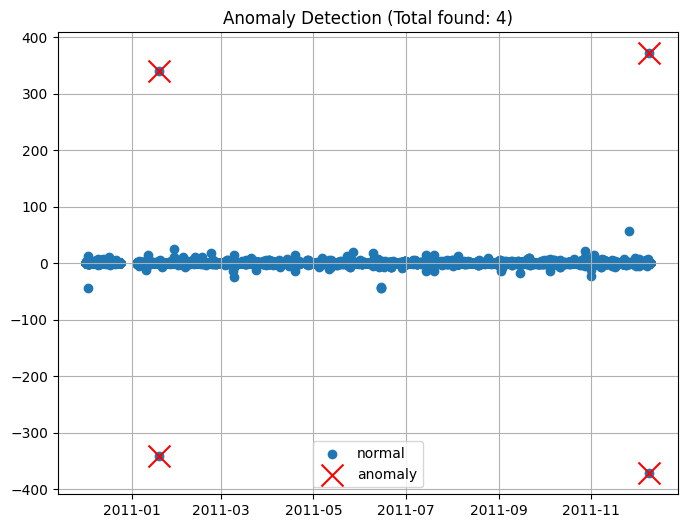

In [25]:
df_anomaly_points_quantity_dynamic = df[df['anomalies_quantity_dynamic'] == 1]

total_anomalies_quantity_dynamic = len(df_anomaly_points_quantity_dynamic)

plt.figure(figsize=(8, 6))
plt.grid('on')

plt.scatter(df.index, df['Quantity'], label='normal')
plt.scatter(df_anomaly_points_quantity_dynamic.index, df_anomaly_points_quantity_dynamic['Quantity'], s=250, c='red', marker='x', label='anomaly')
plt.title(f'Anomaly Detection (Total found: {total_anomalies_quantity_dynamic})')
plt.legend()

# Functions

In [26]:
def calculate_threshold(dataframe, feature_column_name, k):
    top_k = dataframe[feature_column_name].sort_values(ascending=False)[:k].values
    bottom_k = dataframe[feature_column_name].sort_values(ascending=True)[:k].values
    
    print(f'top_{k}: {top_k}')
    print(f'bottom_{k}: {bottom_k}')

    upper_threshold = np.abs(top_k).mean()
    lower_threshold = np.abs(bottom_k).mean()
    
    print(f'Upper threshold: {upper_threshold:.4f}')
    print(f'Lower threshold: {lower_threshold:.4f}')

    return upper_threshold, lower_threshold


def plot_anomalies(dataframe, feature_column_name, anomaly_column_name):
    df_anomaly_points = dataframe[dataframe[anomaly_column_name] == 1]
    
    total_anomalies = len(df_anomaly_points)
    
    plt.figure(figsize=(8, 6))
    plt.grid('on')
    
    plt.scatter(dataframe.index, dataframe[feature_column_name], label='normal')
    plt.scatter(df_anomaly_points.index, df_anomaly_points[feature_column_name], s=250, c='red', marker='x', label='anomaly')
    plt.title(f'Anomaly Detection (Total found: {total_anomalies})')
    plt.legend()


def detect_anomalies(dataframe, feature_column_name, anomaly_column_name, k):
    upper_threshold, lower_threshold = calculate_threshold(dataframe, feature_column_name, k)

    df[anomaly_column_name] = (df[feature_column_name] < -lower_threshold) | (df[feature_column_name] > upper_threshold)
    df[anomaly_column_name] = df[anomaly_column_name].apply(int)

    plot_anomalies(dataframe, feature_column_name, anomaly_column_name)

top_10: [402.7023978  184.28991751 174.48790929 169.99937002 139.90028868
 139.90028868 139.90028868 139.21260614 119.69736628 114.27734478]
bottom_10: [-1.14372655e+02 -1.14372655e+02 -4.76552799e-02 -4.76552799e-02
 -4.76552799e-02 -4.76552799e-02 -4.76552799e-02 -4.76552799e-02
 -4.76552799e-02 -4.76552799e-02]
Upper threshold: 172.4368
Lower threshold: 22.9127


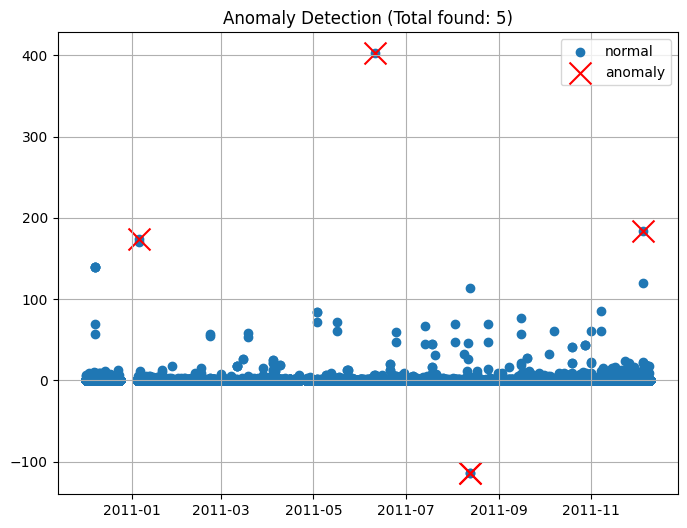

In [27]:
detect_anomalies(df, 'UnitPrice', 'anomalies_unitprice', 10)